In [1]:
!pip install keras  



In [2]:
pip install tensorflow  


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikeras


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tns
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import classification_report, accuracy_score
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential

    
 


In [5]:
df = pd.read_csv('/Users/shreyasingh/Downloads/Neural networks/Alphabets_data.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


# data exploration

In [7]:
df.isnull()


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().any()

letter    False
xbox      False
ybox      False
width     False
height    False
onpix     False
xbar      False
ybar      False
x2bar     False
y2bar     False
xybar     False
x2ybar    False
xy2bar    False
xedge     False
xedgey    False
yedge     False
yedgex    False
dtype: bool

In [9]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [10]:
df.shape

(20000, 17)

In [11]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [12]:
df.nunique()

letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [14]:
df[df.duplicated()].shape

(1332, 17)

In [15]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


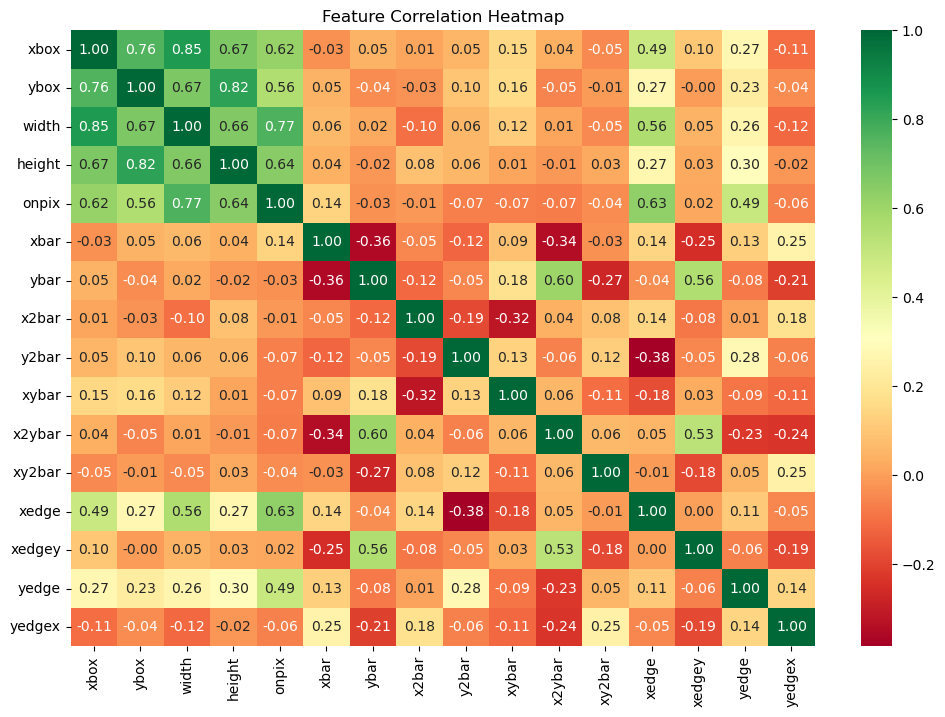

In [17]:
correlation_matrix = df.drop('letter', axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlGn", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
correlation_matrix = df.corr()
print(correlation_matrix)

            xbox      ybox     width    height     onpix      xbar      ybar  \
xbox    1.000000  0.757793  0.851514  0.672764  0.619097 -0.032595  0.045545   
ybox    0.757793  1.000000  0.671912  0.823207  0.555067  0.045690 -0.040925   
width   0.851514  0.671912  1.000000  0.660215  0.765716  0.061959  0.024832   
height  0.672764  0.823207  0.660215  1.000000  0.644366  0.042844 -0.020072   
onpix   0.619097  0.555067  0.765716  0.644366  1.000000  0.139159 -0.028822   
xbar   -0.032595  0.045690  0.061959  0.042844  0.139159  1.000000 -0.356580   
ybar    0.045545 -0.040925  0.024832 -0.020072 -0.028822 -0.356580  1.000000   
x2bar   0.014306 -0.025019 -0.098611  0.082383 -0.011985 -0.053306 -0.118625   
y2bar   0.052086  0.096478  0.057074  0.059032 -0.065557 -0.122851 -0.049658   
xybar   0.148056  0.159954  0.115018  0.012458 -0.069776  0.085963  0.178318   
x2ybar  0.035464 -0.054648  0.011694 -0.011991 -0.072941 -0.341957  0.600397   
xy2bar -0.046333 -0.007568 -0.045009  0.

/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_68228/2020863294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [19]:
df.corr()["xbox"].sort_values(ascending=False)

/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_68228/3687708468.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["xbox"].sort_values(ascending=False)


xbox      1.000000
width     0.851514
ybox      0.757793
height    0.672764
onpix     0.619097
xedge     0.489155
yedge     0.273504
xybar     0.148056
xedgey    0.098180
y2bar     0.052086
ybar      0.045545
x2ybar    0.035464
x2bar     0.014306
xbar     -0.032595
xy2bar   -0.046333
yedgex   -0.105147
Name: xbox, dtype: float64

In [20]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge',
       'yedgex'],
      dtype='object')

/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_68228/959258083.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


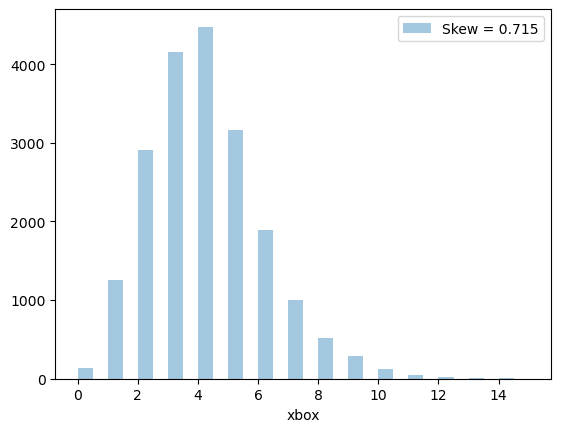

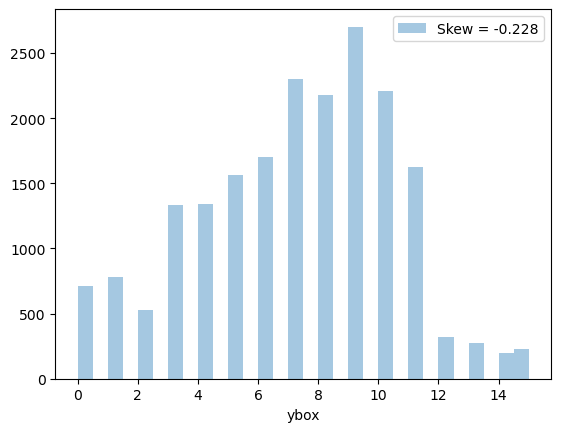

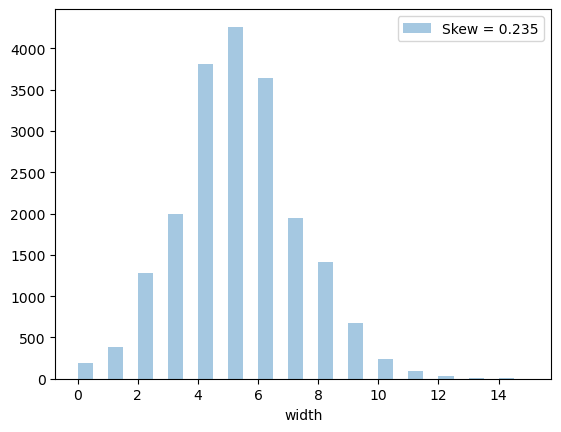

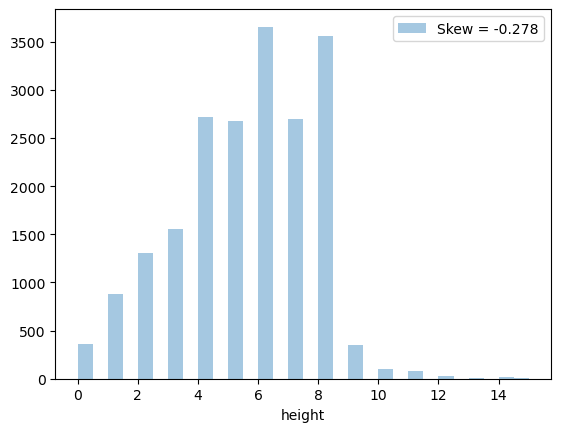

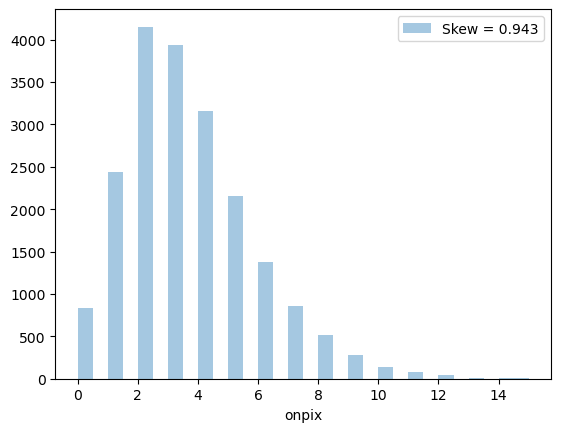

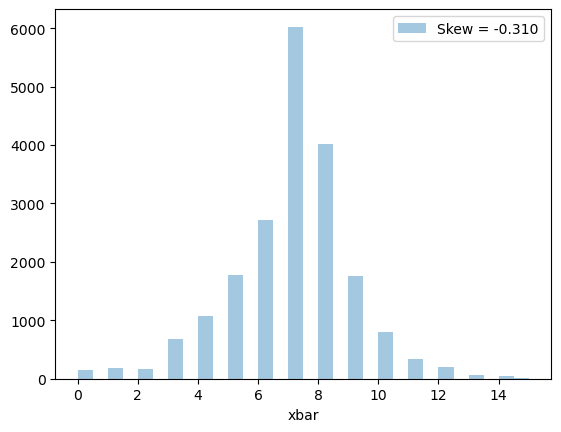

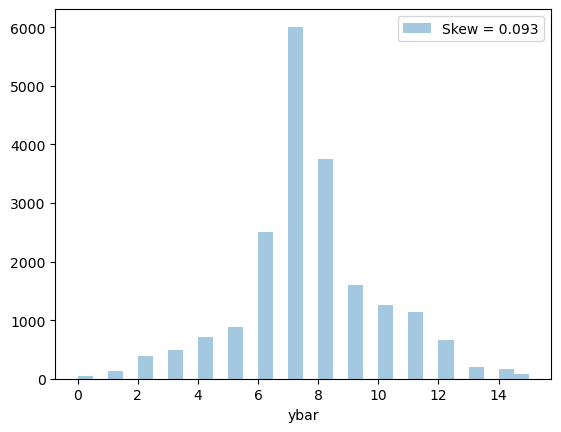

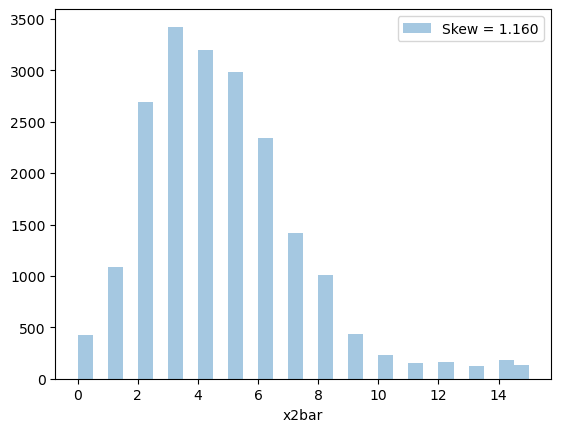

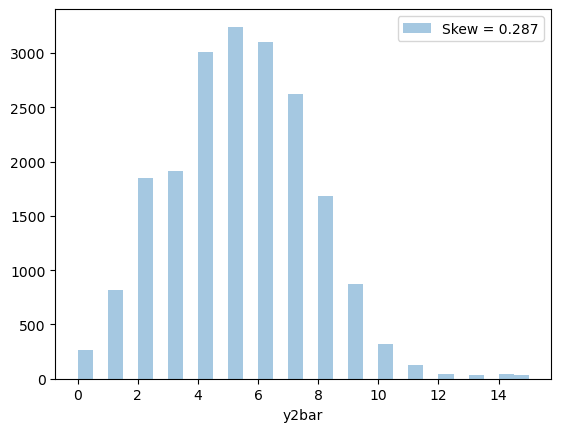

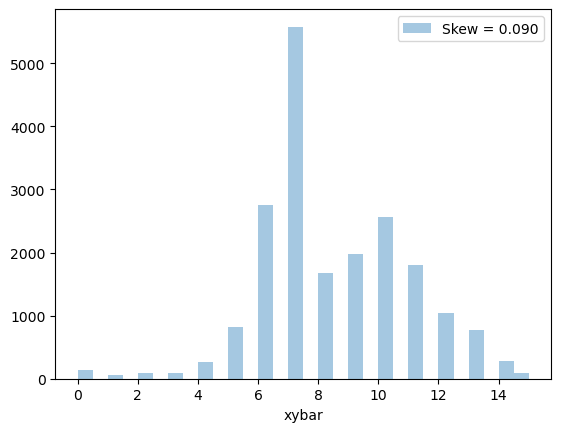

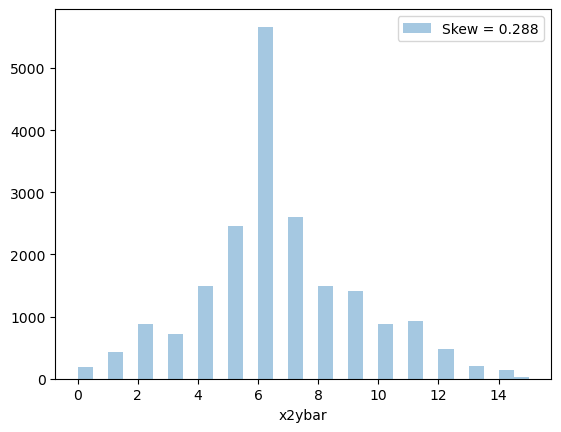

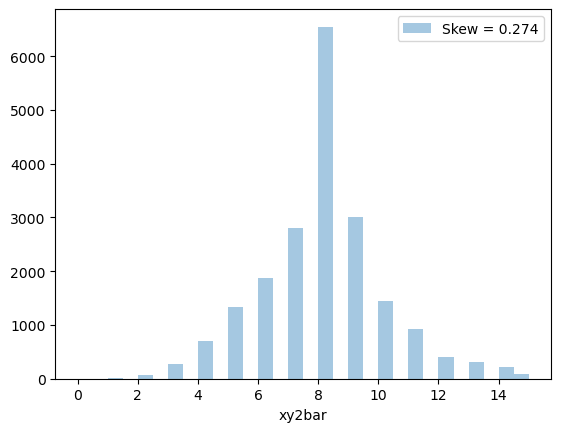

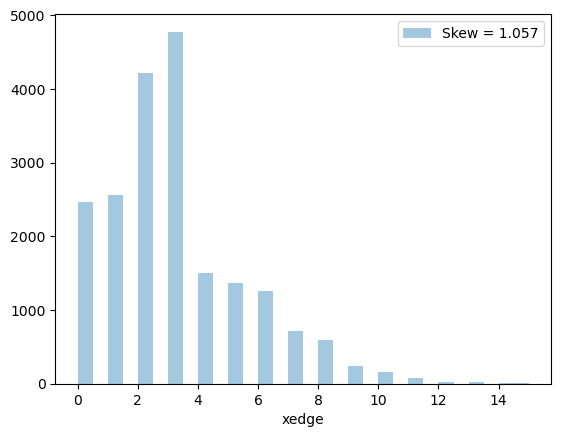

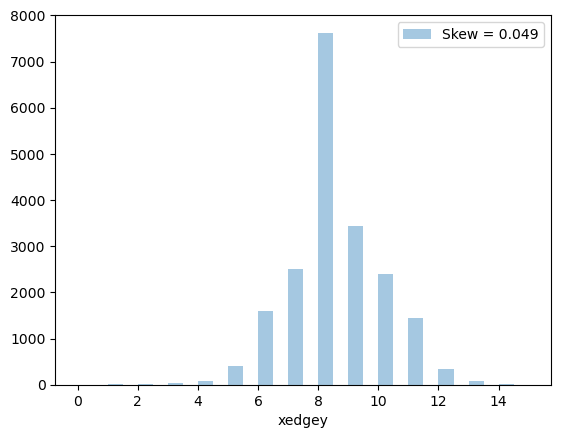

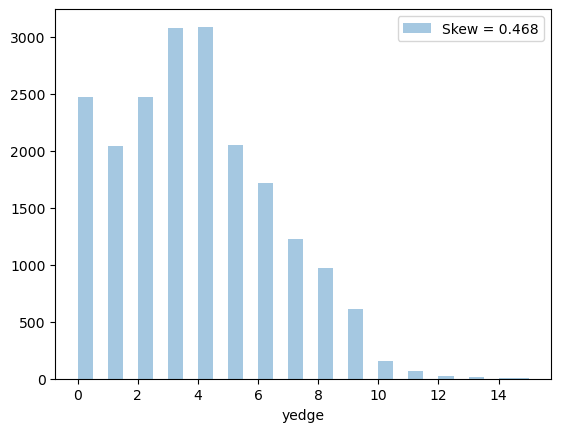

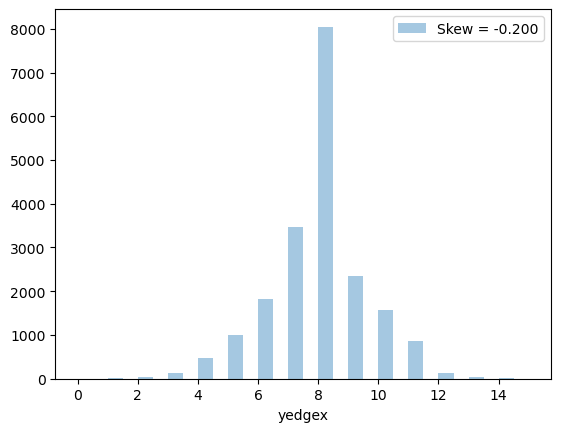

In [21]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [22]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 545 observations with more than 2 outliers


In [23]:
numerical_features

['xbox',
 'ybox',
 'width',
 'height',
 'onpix',
 'xbar',
 'ybar',
 'x2bar',
 'y2bar',
 'xybar',
 'x2ybar',
 'xy2bar',
 'xedge',
 'xedgey',
 'yedge',
 'yedgex']

/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_68228/1557023775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='xbox', data=ot, palette='crest', ax=axes[0])
/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_68228/1557023775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ybox', data=ot, palette='crest', ax=axes[1])
/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_68228/1557023775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='width', data=ot, palette='crest', ax=axes[2])
/var/folders/f9/_4

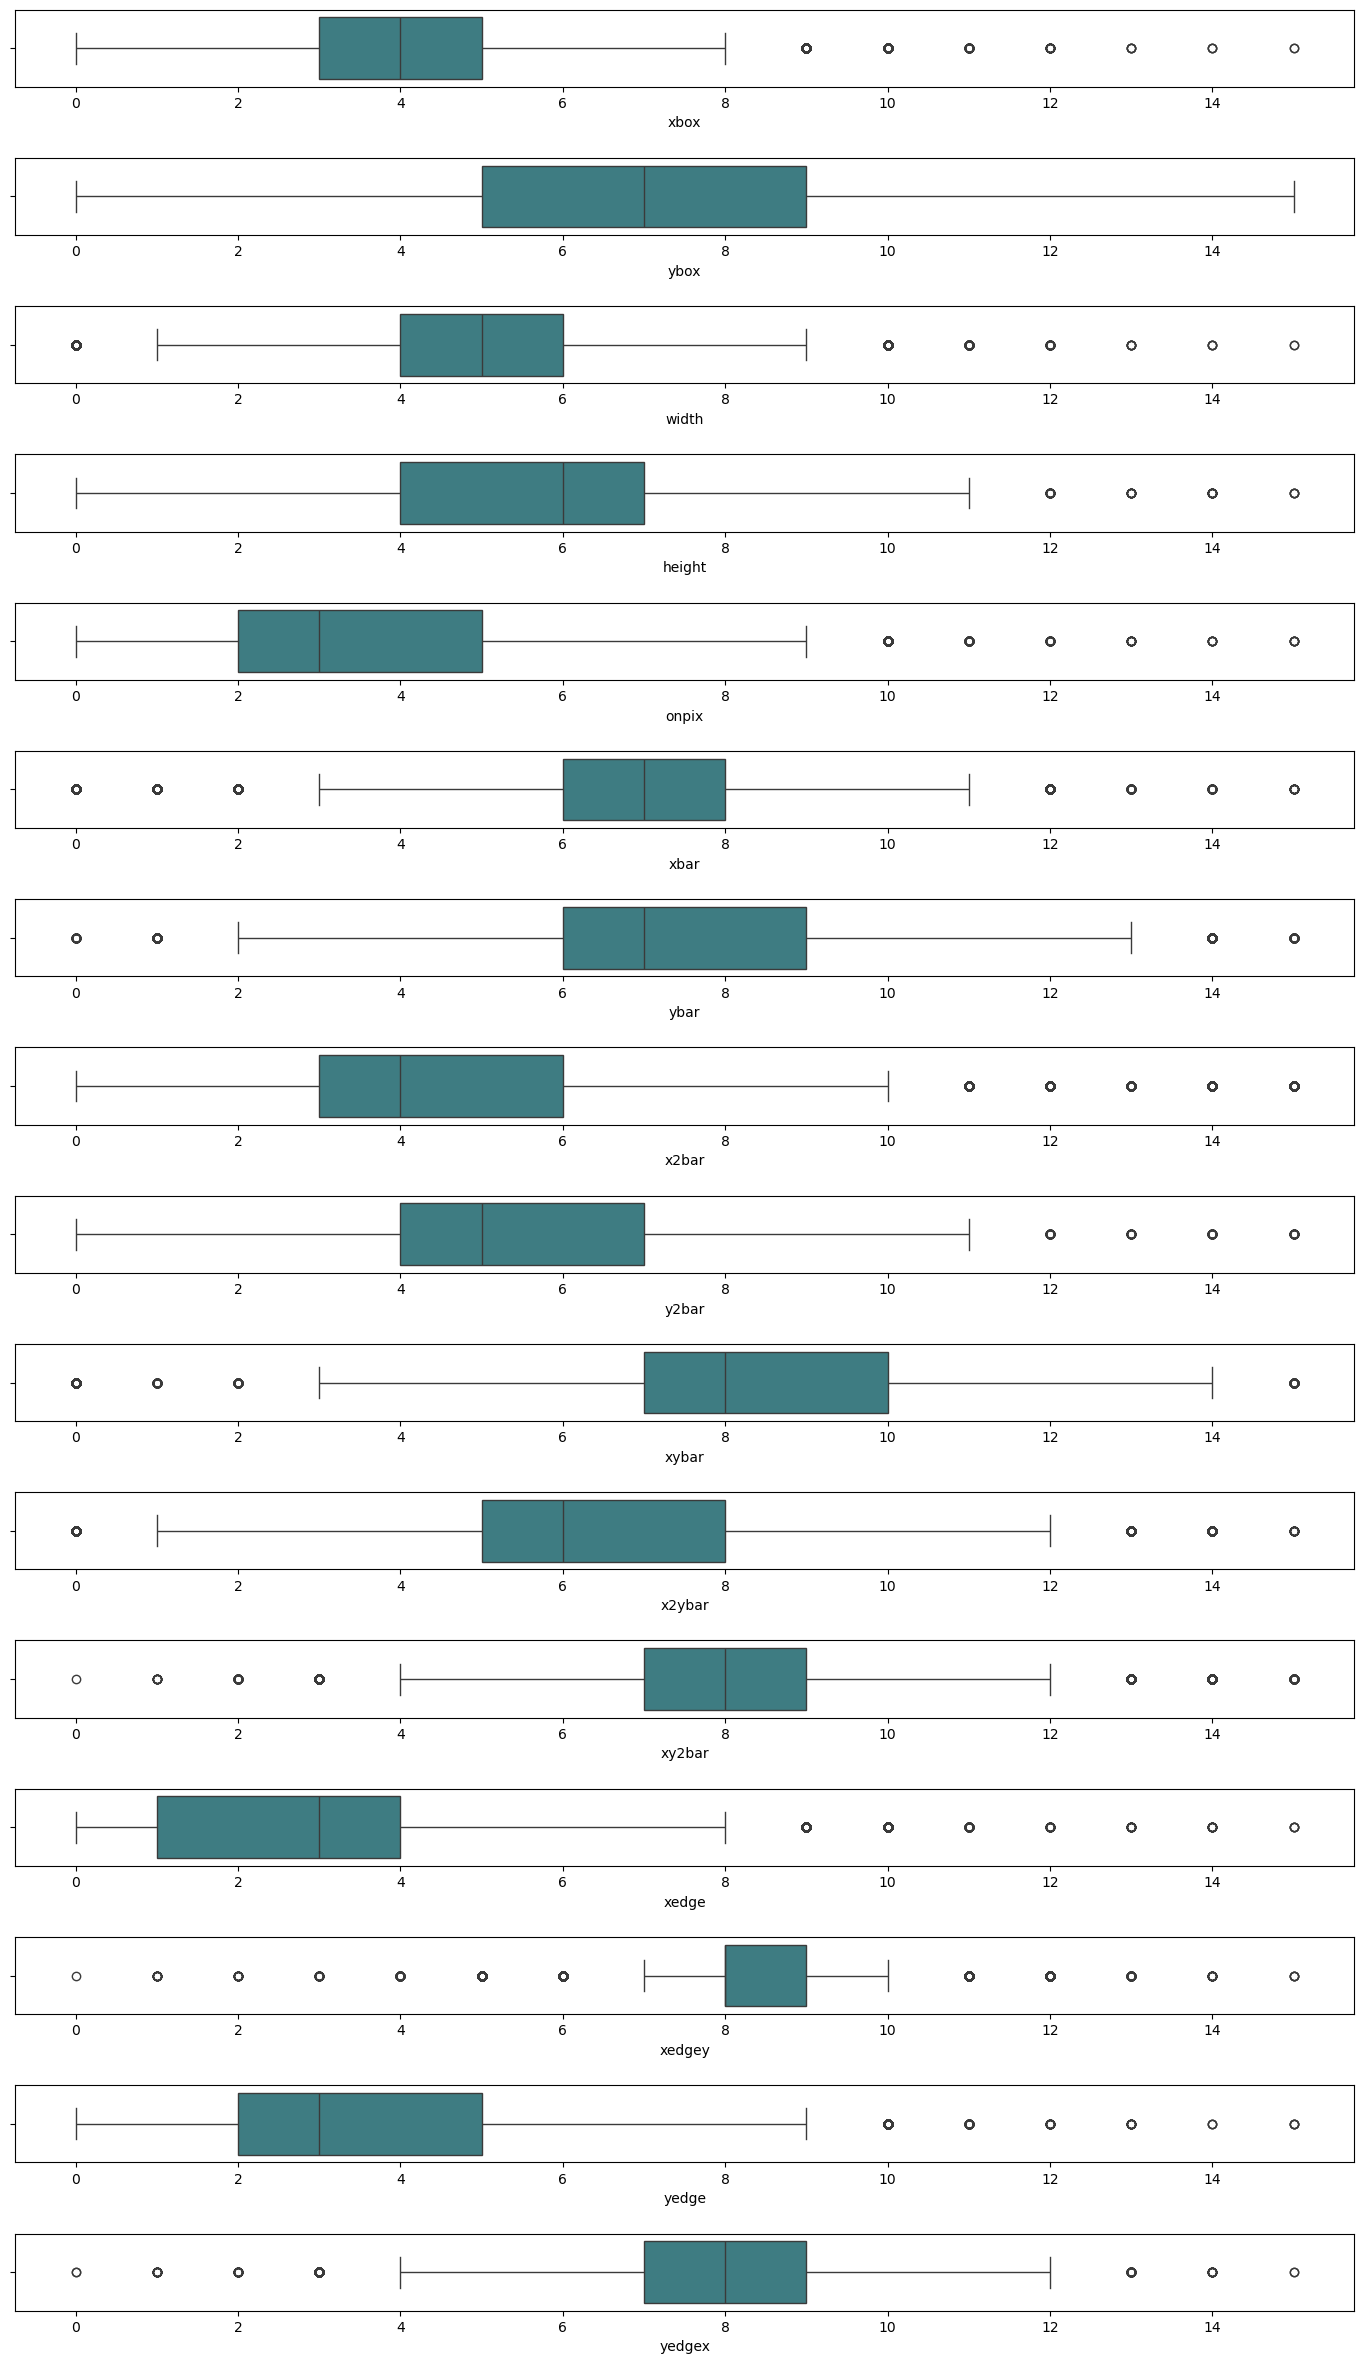

In [24]:
ot = df.copy()   

fig, axes = plt.subplots(16, 1, figsize=(14, 24), sharex=False, sharey=False)

sns.boxplot(x='xbox', data=ot, palette='crest', ax=axes[0])
sns.boxplot(x='ybox', data=ot, palette='crest', ax=axes[1])
sns.boxplot(x='width', data=ot, palette='crest', ax=axes[2])
sns.boxplot(x='height', data=ot, palette='crest', ax=axes[3])
sns.boxplot(x='onpix', data=ot, palette='crest', ax=axes[4])
sns.boxplot(x='xbar', data=ot, palette='crest', ax=axes[5])
sns.boxplot(x='ybar', data=ot, palette='crest', ax=axes[6])
sns.boxplot(x='x2bar', data=ot, palette='crest', ax=axes[7])
sns.boxplot(x='y2bar', data=ot, palette='crest', ax=axes[8])
sns.boxplot(x='xybar', data=ot, palette='crest', ax=axes[9])
sns.boxplot(x='x2ybar', data=ot, palette='crest', ax=axes[10])
sns.boxplot(x='xy2bar', data=ot, palette='crest', ax=axes[11])
sns.boxplot(x='xedge', data=ot, palette='crest', ax=axes[12])
sns.boxplot(x='xedgey', data=ot, palette='crest', ax=axes[13])
sns.boxplot(x='yedge', data=ot, palette='crest', ax=axes[14])
sns.boxplot(x='yedgex', data=ot, palette='crest', ax=axes[15])

plt.tight_layout(pad=2.0)
plt.show()


<Axes: >

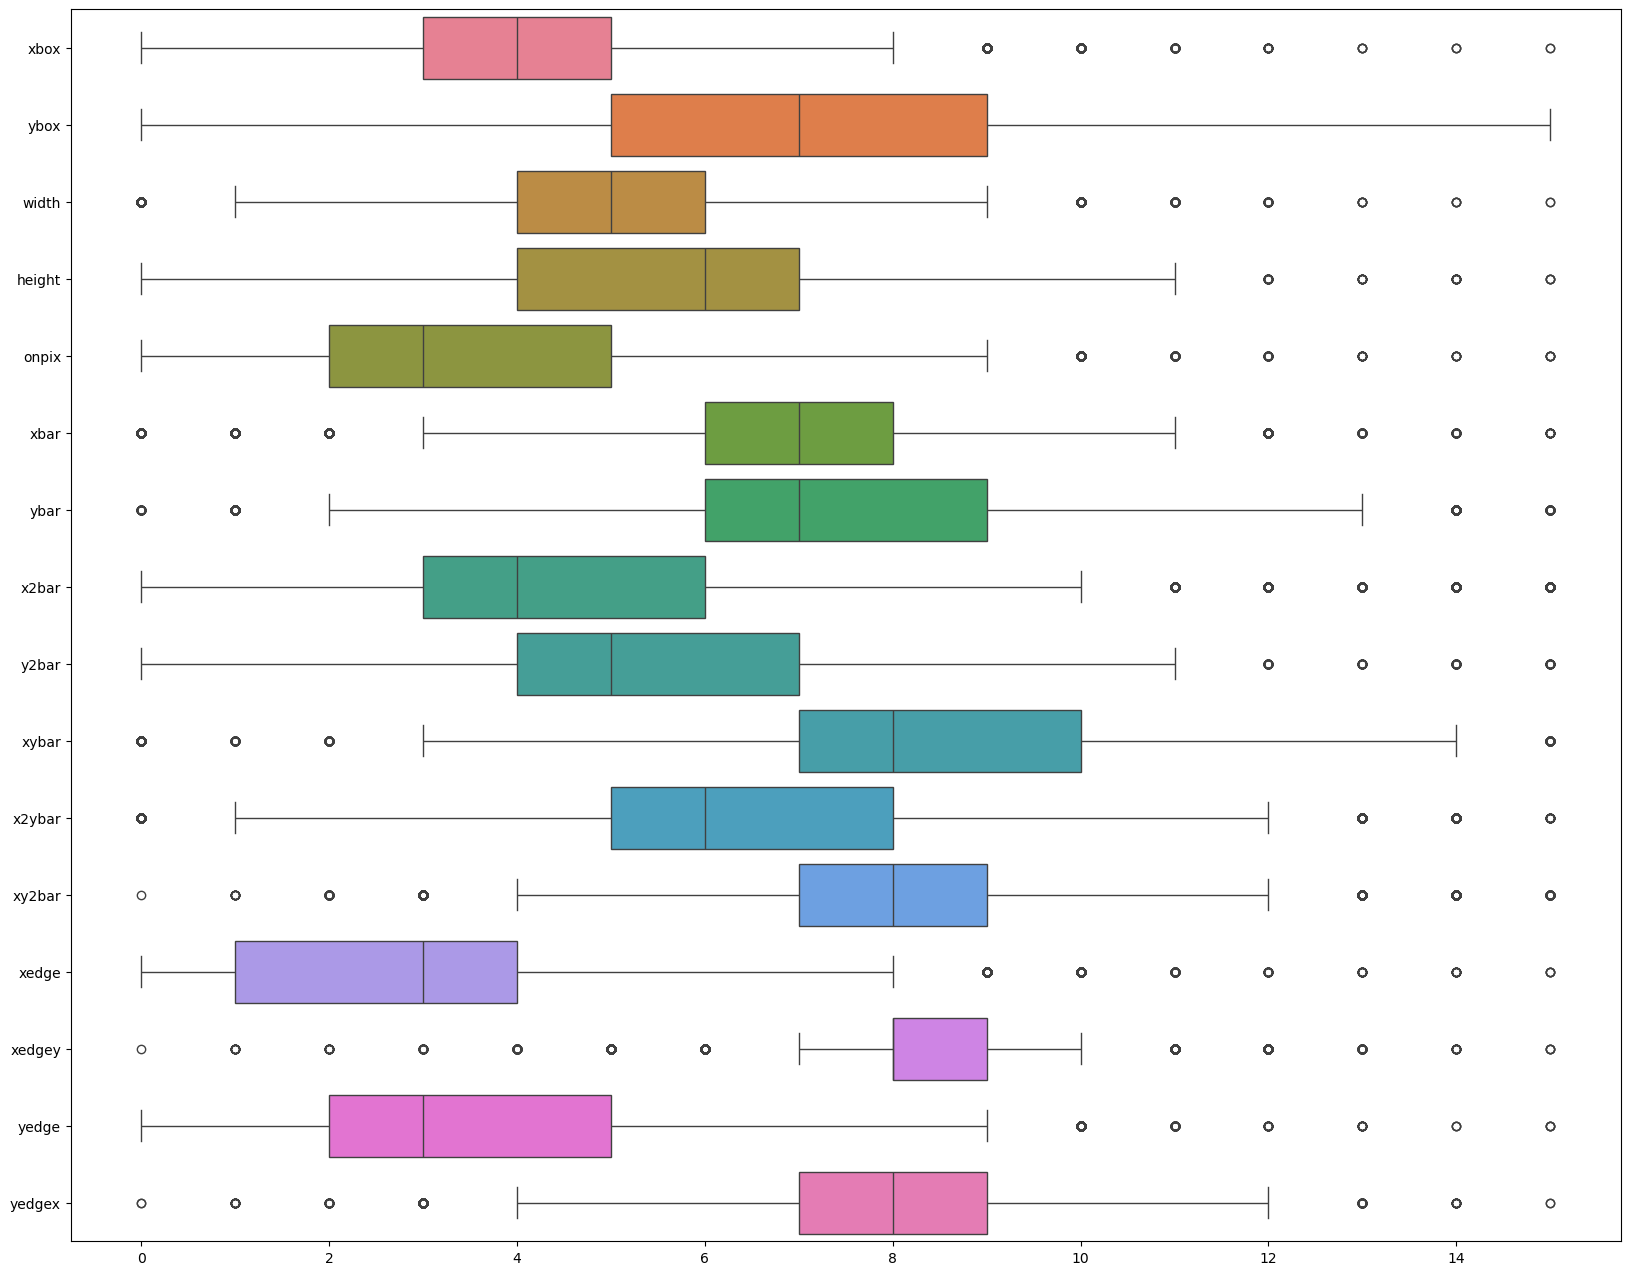

In [25]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

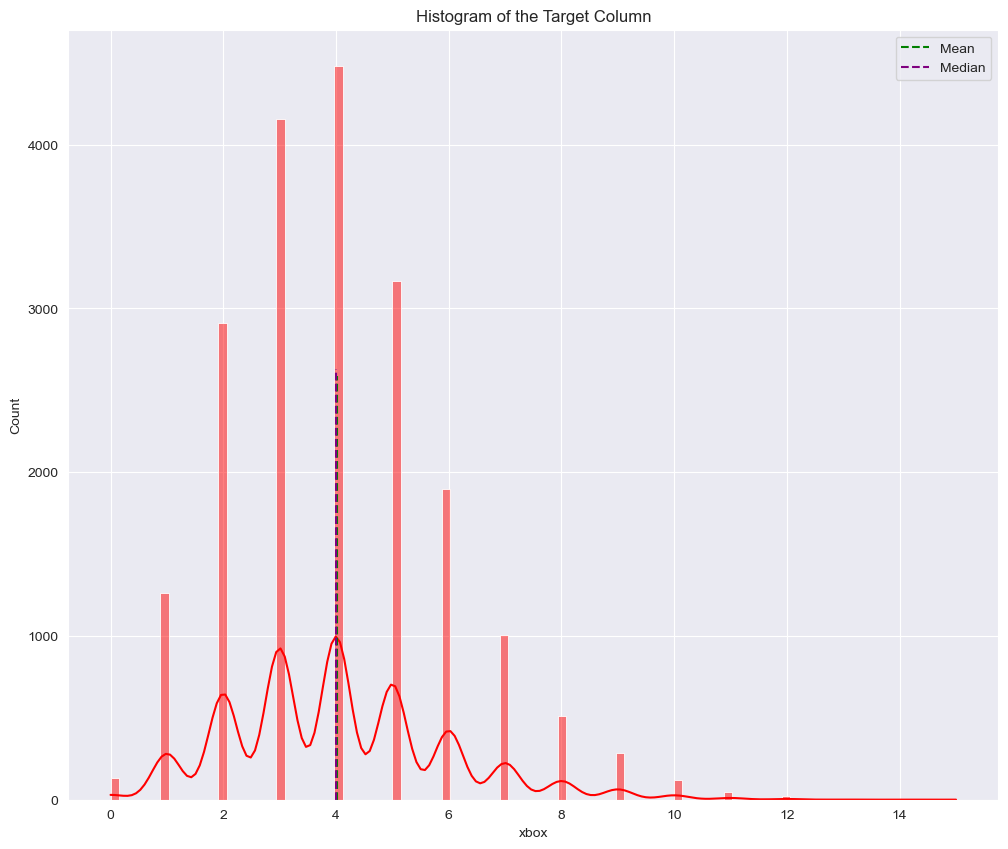

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="xbox",color="red",kde=True)
plt.axvline(x=df["xbox"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["xbox"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

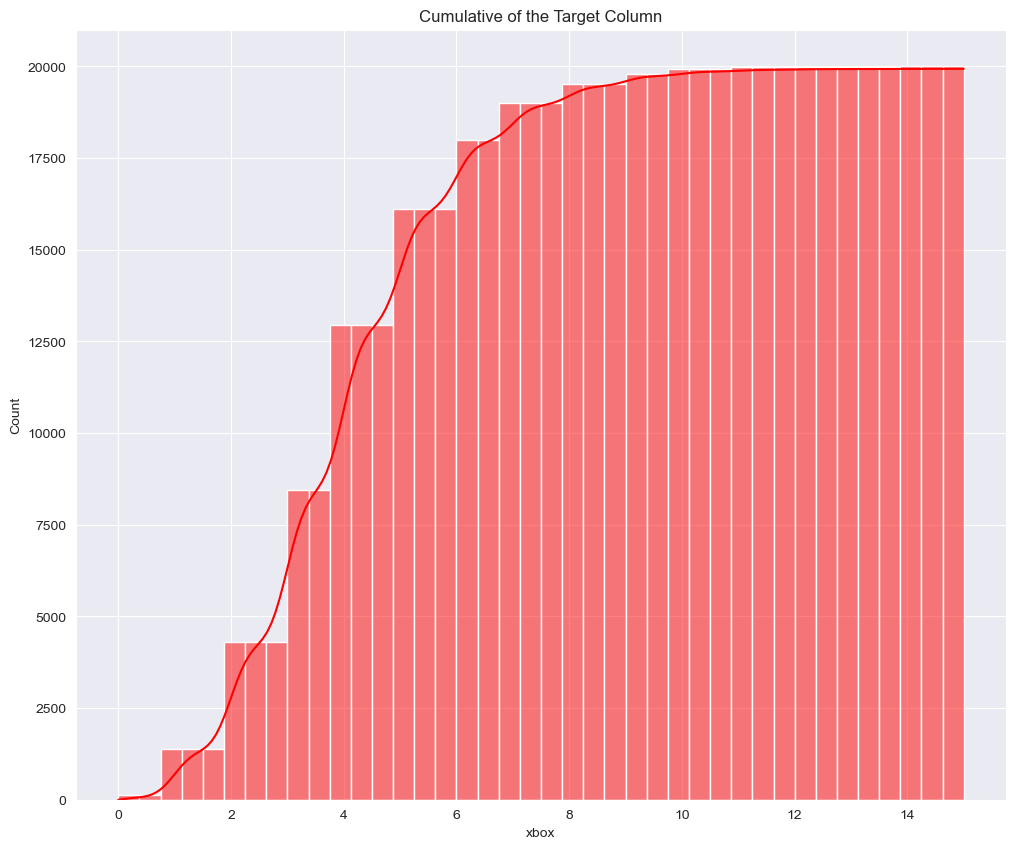

In [27]:
plt.figure(figsize = (12,10))
sns.histplot(df["xbox"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

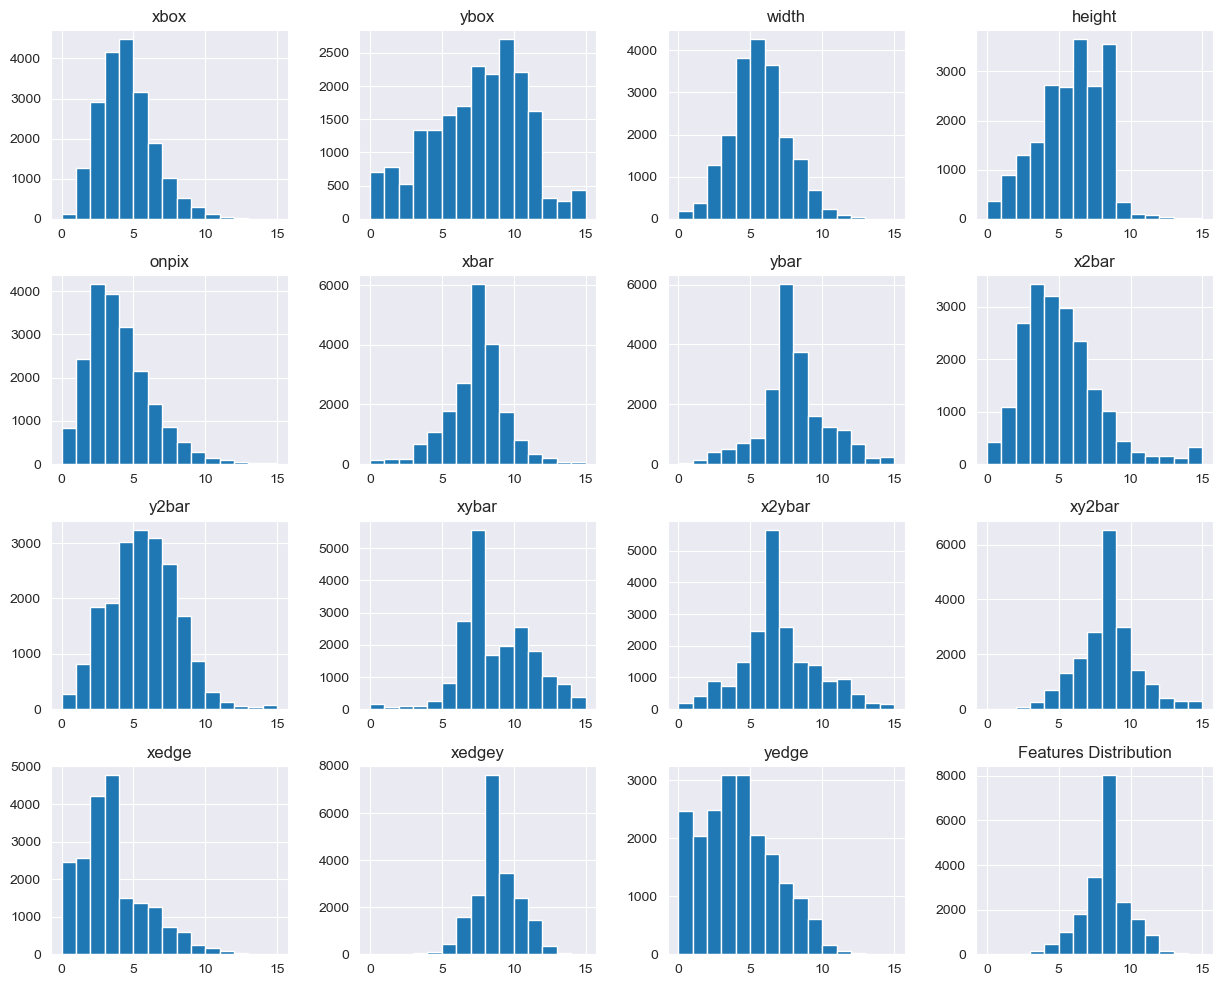

In [28]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# data preprocessing

In [30]:
# Separate features and target
X = df.drop('letter', axis=1)  # Features
y = df['letter']  # Target

In [31]:
# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [32]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [33]:
# Display encoded classes
print("\nClasses in the dataset:")
print(label_encoder.classes_)



Classes in the dataset:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [34]:
# Split data into training, validation, and test sets  
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [35]:
# Summary of processed data
print("\nShapes of Datasets:")
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation set: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test set: X_test: {X_test.shape}, y_test: {y_test.shape}")


Shapes of Datasets:
Training set: X_train: (14000, 16), y_train: (14000,)
Validation set: X_val: (3000, 16), y_val: (3000,)
Test set: X_test: (3000, 16), y_test: (3000,)


# ANN Model

In [37]:
# Build a basic ANN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),                              # Second hidden layer
    Dense(len(label_encoder.classes_), activation='softmax')   # Output layer
])
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
#Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1302 - loss: 3.0879 - val_accuracy: 0.4082 - val_loss: 2.1368
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.4596 - loss: 1.9287 - val_accuracy: 0.5225 - val_loss: 1.6445
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.5476 - loss: 1.5616 - val_accuracy: 0.5821 - val_loss: 1.4658
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.6106 - loss: 1.3742 - val_accuracy: 0.6443 - val_loss: 1.3394
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.6361 - loss: 1.3005 - val_accuracy: 0.6511 - val_loss: 1.2681
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.6582 - loss: 1.2169 - val_accuracy: 0.6782 - val_loss: 1.2023
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.6787 - loss: 1.1550 - val_accuracy: 0.6896 - val_loss: 1.1465
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.6980 - loss: 1.0890 - va

In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.78


In [41]:
#Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


In [42]:
# Decode predictions back to letter labels
decoded_predictions = label_encoder.inverse_transform(predicted_classes)


In [43]:
# Display some predictions
print("Sample predictions:")
for i in range(5):
    print(f"Predicted: {decoded_predictions[i]}, Actual: {label_encoder.inverse_transform([y_test[i]])[0]}")


Sample predictions:
Predicted: B, Actual: B
Predicted: P, Actual: P
Predicted: U, Actual: U
Predicted: M, Actual: M
Predicted: A, Actual: A


In [44]:
# Define the model creation function
def create_model(hidden_layers=1, neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [45]:
 
# Wrap the model using Scikeras KerasClassifier
model = KerasClassifier(
    model=create_model,
    hidden_layers=1,
    neurons=32,
    activation='relu',
    learning_rate=0.001,
    batch_size=32,
    epochs=10,
    verbose=0
)


In [46]:
# Define the parameter grid
param_grid = {
    'hidden_layers': [1, 2, 3],
    'neurons': [16, 32, 64],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}


In [ ]:
# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

In [ ]:
#Output the best parameters and model performance
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_result.best_score_:.4f}")


In [ ]:
#Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.4f}")

In [ ]:
# Predict on the test set using the default and tuned models
y_pred_default = model.predict(X_test)  # Predictions from the default model
y_pred_tuned = best_model.predict(X_test)  # Predictions from the tuned model

In [ ]:
# Output the best parameters and accuracy
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_result.best_score_:.4f}")

In [ ]:
best_model = grid_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.4f}")


In [ ]:
# Neural Network Model Definition
def create_model(optimizer='adam', use_batch_norm=True):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    
    # Add Batch Normalization if specified
    if use_batch_norm:
        model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    
    # Add Batch Normalization if specified
    if use_batch_norm:
        model.add(BatchNormalization())
    
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    
    # Output layer
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Multi-class classification
    
    # Compile the model with different optimizers
    if optimizer == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=0.001)
    else:
        opt = Adam(learning_rate=0.001)
    
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
# Train and evaluate the model using Adam optimizer and Batch Normalization
adam_model = create_model(optimizer='adam', use_batch_norm=True)
history_adam = adam_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Train and evaluate the model using RMSprop optimizer and Batch Normalization
rmsprop_model = create_model(optimizer='rmsprop', use_batch_norm=True)
history_rmsprop = rmsprop_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Train and evaluate the model using Adam optimizer without Batch Normalization
adam_no_bn_model = create_model(optimizer='adam', use_batch_norm=False)
history_adam_no_bn = adam_no_bn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Visualize the training and validation accuracy for all three models
plt.figure(figsize=(12, 8))

# Adam with Batch Normalization
plt.plot(history_adam.history['accuracy'], label='Adam (with Batch Norm) - Train')
plt.plot(history_adam.history['val_accuracy'], label='Adam (with Batch Norm) - Val')

# RMSprop with Batch Normalization
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop (with Batch Norm) - Train')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop (with Batch Norm) - Val')

# Adam without Batch Normalization
plt.plot(history_adam_no_bn.history['accuracy'], label='Adam (without Batch Norm) - Train')
plt.plot(history_adam_no_bn.history['val_accuracy'], label='Adam (without Batch Norm) - Val')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

